In [47]:
%matplotlib inline

# Project 3
## (c) Supervised Learning

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.datasets import load_digits

data = load_digits()

### Experimental: SVM on Entire Data Set

Can we fit any model to the entire 64-dimensional dataset?

In [49]:
from sklearn import svm
from sklearn.model_selection import train_test_split
import datetime

Xtrain, Xtest, ytrain, ytest = train_test_split(data.data, data.target, random_state=1)

clf = svm.NuSVC()
clf.fit(Xtrain, ytrain)

NuSVC(cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, nu=0.5, probability=False, random_state=None,
   shrinking=True, tol=0.001, verbose=False)

In [50]:
ypred = clf.predict(Xtest)

             precision    recall  f1-score   support

          0       1.00      0.51      0.67        53
          1       1.00      0.38      0.55        42
          2       1.00      0.49      0.66        41
          3       1.00      0.23      0.38        52
          4       1.00      0.53      0.69        47
          5       0.14      1.00      0.25        39
          6       1.00      0.65      0.79        43
          7       1.00      0.44      0.61        48
          8       1.00      0.43      0.60        37
          9       1.00      0.17      0.29        48

avg / total       0.93      0.47      0.55       450



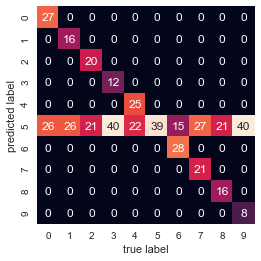

In [51]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(ytest, ypred))

mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Experimental: Selecting the Best SVM Model

In [58]:
models = (svm.LinearSVC(),
          svm.SVC())

C_rng = [1e-3, 1e-2, 1e-1, 1, 1e2, 1e3]
tol_rng = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]

params = (
    {'tol': tol_rng,
     'C': C_rng,
     'fit_intercept': [True, False]}, 
    {'kernel': ['linear', 'rbf', 'poly'],
     'C': C_rng,
     'degree': [2, 3, 4, 5, 6],
     #'gamma': ['auto', 'scale'],
     'tol': tol_rng})

from sklearn.model_selection import GridSearchCV

Xtrain, Xtest, ytrain, ytest = train_test_split(data.data, data.target, random_state = 42)

grids = [None, None]

for i, mi in enumerate(models):
    grids[i] = GridSearchCV(mi, params[i])
    
    %time grids[i].fit(Xtrain, ytrain)
    print grids[i].best_params_

CPU times: user 27.8 s, sys: 3.56 s, total: 31.3 s
Wall time: 15.8 s
{'C': 0.001, 'tol': 1e-06, 'fit_intercept': True}
CPU times: user 4min 2s, sys: 1.15 s, total: 4min 3s
Wall time: 4min 7s
{'kernel': 'poly', 'C': 0.001, 'tol': 0.1, 'degree': 4}
